# **VRP**

In [78]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries

!pip install matplotlib deap

In [79]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [80]:
# TODO: Task 2 - Define the number of locations and vehicles

#num_locations =  Define the number of locations (eg 10)

#locations =  Create a list of tuples representing location coordinates -
#             try to use a random number generator
#             (x, y) could be between 0 and 100

#depot =  Define the coordinates for the depot

#num_vehicles =  Define the number of vehicles - (eg 3)

In [81]:
num_locations = 20

locations = [(random.randint(0, 100), random.randint(0, 100)) for i in range(num_locations)]

depot = (50, 50)

num_vehicles = 3

In [82]:
print(locations)
depot

[(17, 30), (76, 47), (100, 11), (27, 51), (35, 9), (82, 7), (2, 83), (77, 55), (71, 28), (92, 55), (42, 15), (9, 34), (8, 59), (44, 39), (29, 3), (67, 45), (94, 13), (95, 52), (16, 26), (18, 62)]


(50, 50)

In [83]:
#Task 3
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [84]:
#Task 4
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [85]:
# TASK 5 and 6

#def evalVRP(individual):
    # TODO: Task 5 - Write the fitness evaluation function
    #              - Return (total distance, standard deviation)



#TASK 6 - Register the evaluate function in the toolbox

In [86]:
# TASK 5 and 6

def evalVRP(individual):
    # TODO: Task 5 - Write the fitness evaluation function
    #              - Return (total distance, standard deviation)
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = 0
        for j in range(len(vehicle_route) - 1):
            vehicle_distance += np.linalg.norm(np.array(vehicle_route[j]) - np.array(vehicle_route[j + 1]))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(total_distance)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty



#TASK 6 - Register the evaluate function in the toolbox
toolbox.register("evaluate", evalVRP)

In [87]:
#HINTS

#Select is simpler, try tournament selection or roulette selection. Look up how to add that.

#FOR mutation - mutShuffleIndexes

#For mate - cxPartialyMatched, cxOrdered

In [88]:
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [89]:
# prompt: # Plotting Function
# def plot_routes(individual, title="Routes"):
#     #TODO: Task 5 - Write a function to visualize the routes - just plot the points and lines for each vehicle

# Plotting Function
def plot_routes(individual, title="Routes"):
    #TODO: Task 5 - Write a function to visualize the routes - just plot the points and lines for each vehicle
    plt.figure(figsize=(8, 6))
    plt.title(title)

    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        x_coords = [point[0] for point in vehicle_route]
        y_coords = [point[1] for point in vehicle_route]
        plt.plot(x_coords, y_coords, marker='o', label=f"Vehicle {i+1}")

    plt.scatter(depot[0], depot[1], color='red', marker='s', label="Depot")  # Highlight the depot
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

gen	nevals	avg   	min
0  	100   	559.69	0  
1  	78    	527.036	0  
2  	76    	514.882	0  
3  	69    	507.276	0  
4  	72    	488.489	0  
5  	76    	483.421	0  
6  	72    	468.947	0  
7  	88    	468.638	0  
8  	90    	448.451	0  
9  	75    	428.448	0  
10 	64    	413.712	0  
11 	75    	404.593	0  
12 	68    	395.304	0  
13 	68    	388.275	0  
14 	77    	390.509	0  
15 	71    	382.464	0  
16 	69    	374.382	0  
17 	76    	378.049	0  
18 	70    	367.995	0  
19 	77    	372.541	0  
20 	82    	371.281	0  
21 	76    	369.485	0  
22 	75    	358.222	0  
23 	66    	352.947	0  
24 	81    	352.58 	0  
25 	83    	355.179	0  
26 	84    	350.267	0  
27 	81    	337.658	0  
28 	72    	320.66 	0  
29 	76    	312.698	0  
30 	74    	310.306	0  
31 	71    	305.337	0  
32 	73    	306.463	0  
33 	77    	303.107	0  
34 	71    	305.391	0  
35 	82    	311.592	0  
36 	80    	299.203	0  
37 	74    	306.598	0  
38 	70    	303.249	0  
39 	71    	304.48 	0  
40 	81    	301.672	0  
41 	72    	295.25 	0  
42 	76    	29

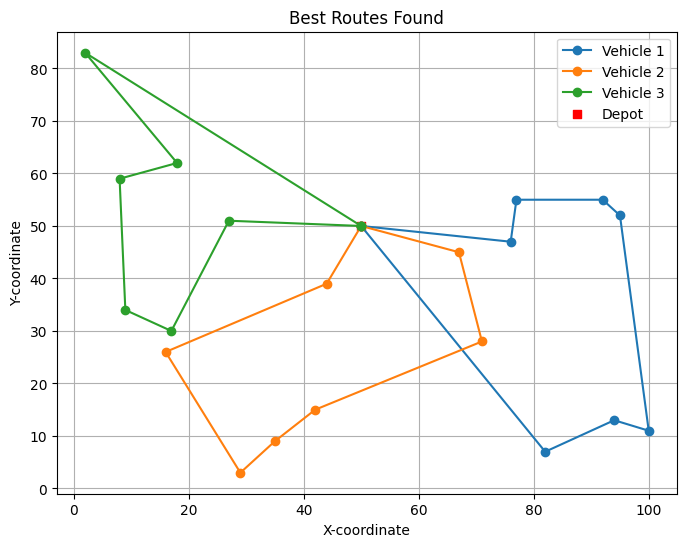

In [91]:
# Genetic Algorithm Execution
def run_ga(population_size=100, generations=100):
    pop = toolbox.population(n=population_size)
    hof = tools.HallOfFame(1)  # Keep track of the best individual
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    # Run the genetic algorithm
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=generations, stats=stats, halloffame=hof, verbose=True)
    return pop, log, hof

# Main execution block
if __name__ == "__main__":
    population, logbook, hall_of_fame = run_ga()
    # Plot the best individual's routes
    plot_routes(hall_of_fame[0], "Best Routes Found")